In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Import lib

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.ticker as mticker
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam, schedules
from keras.callbacks import LearningRateScheduler


# load data

In [ ]:
# load dataset
data=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Mapping the classes

In [ ]:
#the classes for our data
labels={ 
 '0' :'T-shirt',
 '1': 'Trouser',
 '2': 'Pullover' ,
 '3': 'Dress' ,
 '4': 'Coat',
 '5': 'Sandal' ,
 '6': 'Shirt' ,
 '7': 'Sneaker' ,
 '8': 'Bag' ,
 '9': 'Ankle boot'
}

In [ ]:
# shape of dataset
print(data.shape)

(60000, 785)


In [ ]:
# describe dataset
print(data.describe())

              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169    

# split data to input and output (target)

In [ ]:
# get the target label
target=data['label']
target=pd.DataFrame(target)
# creat dataframe containe all images without label
images=data.drop(columns=['label'],axis=1)

In [ ]:
# get number of class in our dataset
len(target.value_counts())

10

<AxesSubplot:>

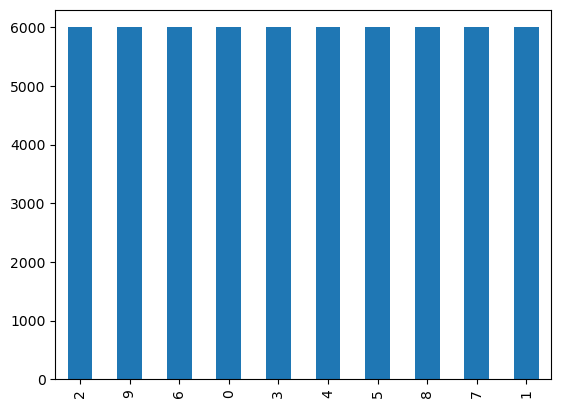

In [ ]:
# show the namber of each classes to check the balance
target.label.value_counts().plot(kind='bar')

# check the null values

In [ ]:
# check number of the  null values in dataset
data.isnull().sum().sum()

0

## check the duplicated values

In [ ]:
#check the duplcated values
print(images.duplicated().sum())


43


In [ ]:
# onther way to get the number of duplicated rows
len(images) - len(images.drop_duplicates())

43

In [ ]:
#drop the 43 duplicate rows
index_of_duplicated=images[images.duplicated()].index

In [ ]:
# the index of the rows that will drop
print(index_of_duplicated)

Int64Index([ 6293, 11845, 20114, 21571, 22159, 23718, 24228, 24443, 28184,
            28635, 28789, 31238, 31627, 32343, 32800, 33399, 33730, 33731,
            37731, 38337, 39489, 39841, 39865, 40033, 40077, 41036, 41877,
            41918, 46015, 49165, 49351, 49588, 51368, 53842, 53883, 54185,
            54584, 54829, 56657, 56840, 57107, 57724, 59607],
           dtype='int64')


In [ ]:
#remove the duplicated from input rows
print(images.shape)
images.drop_duplicates(inplace=True)
print(images.shape)

(60000, 784)
(59957, 784)


In [ ]:
#remove the duplicated from target rows
print(target.shape)
target = target.drop(index_of_duplicated.values)
print(target.shape)

(60000, 1)
(59957, 1)


In [ ]:
# show an image as dataframe 
x=np.array(images.iloc[0]).reshape(28,28)
pd.DataFrame(x).style.set_properties(**{'font-size':'5pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,4,0,0,0,0,0,62,61,21,29,23,51,136,61,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,88,201,228,225,255,115,62,137,255,235,222,255,135,0,0,0,0,0,0,0,0
5,0,0,0,0,0,47,252,234,238,224,215,215,229,108,180,207,214,224,231,249,254,45,0,0,0,0,0,0
6,0,0,1,0,0,214,222,210,213,224,225,217,220,254,233,219,221,217,223,221,240,254,0,0,1,0,0,0
7,1,0,0,0,128,237,207,224,224,207,216,214,210,208,211,221,208,219,213,226,211,237,150,0,0,0,0,0
8,0,2,0,0,237,222,215,207,210,212,213,206,214,213,214,213,210,215,214,206,199,218,255,13,0,2,0,0
9,0,4,0,85,228,210,218,200,211,208,203,215,210,209,209,210,213,211,210,217,206,213,231,175,0,0,0,0


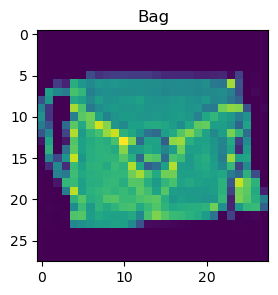

In [ ]:
# show a random image from the dataset
x=np.random.randint(0,5000)
plt.figure(figsize =(3,3))
# first_t_shirt = np.asarray(pd.DataFrame(images).iloc[5]/255).reshape(28, 28)
first_t_shirt =np.array(images.iloc[x]).reshape(28,28)
plt.title(labels[str(target.iloc[x,0])])
plt.imshow(first_t_shirt)

# reshape each image in dataset to (28 x 28 )


In [ ]:
# reshape each image in dataset to (28 x 28 )
images = np.array(images).reshape(images.shape[0],28,28)

In [ ]:
# check the shape of images after reshapeing
images.shape

(59957, 28, 28)

# plot  random 50 images 

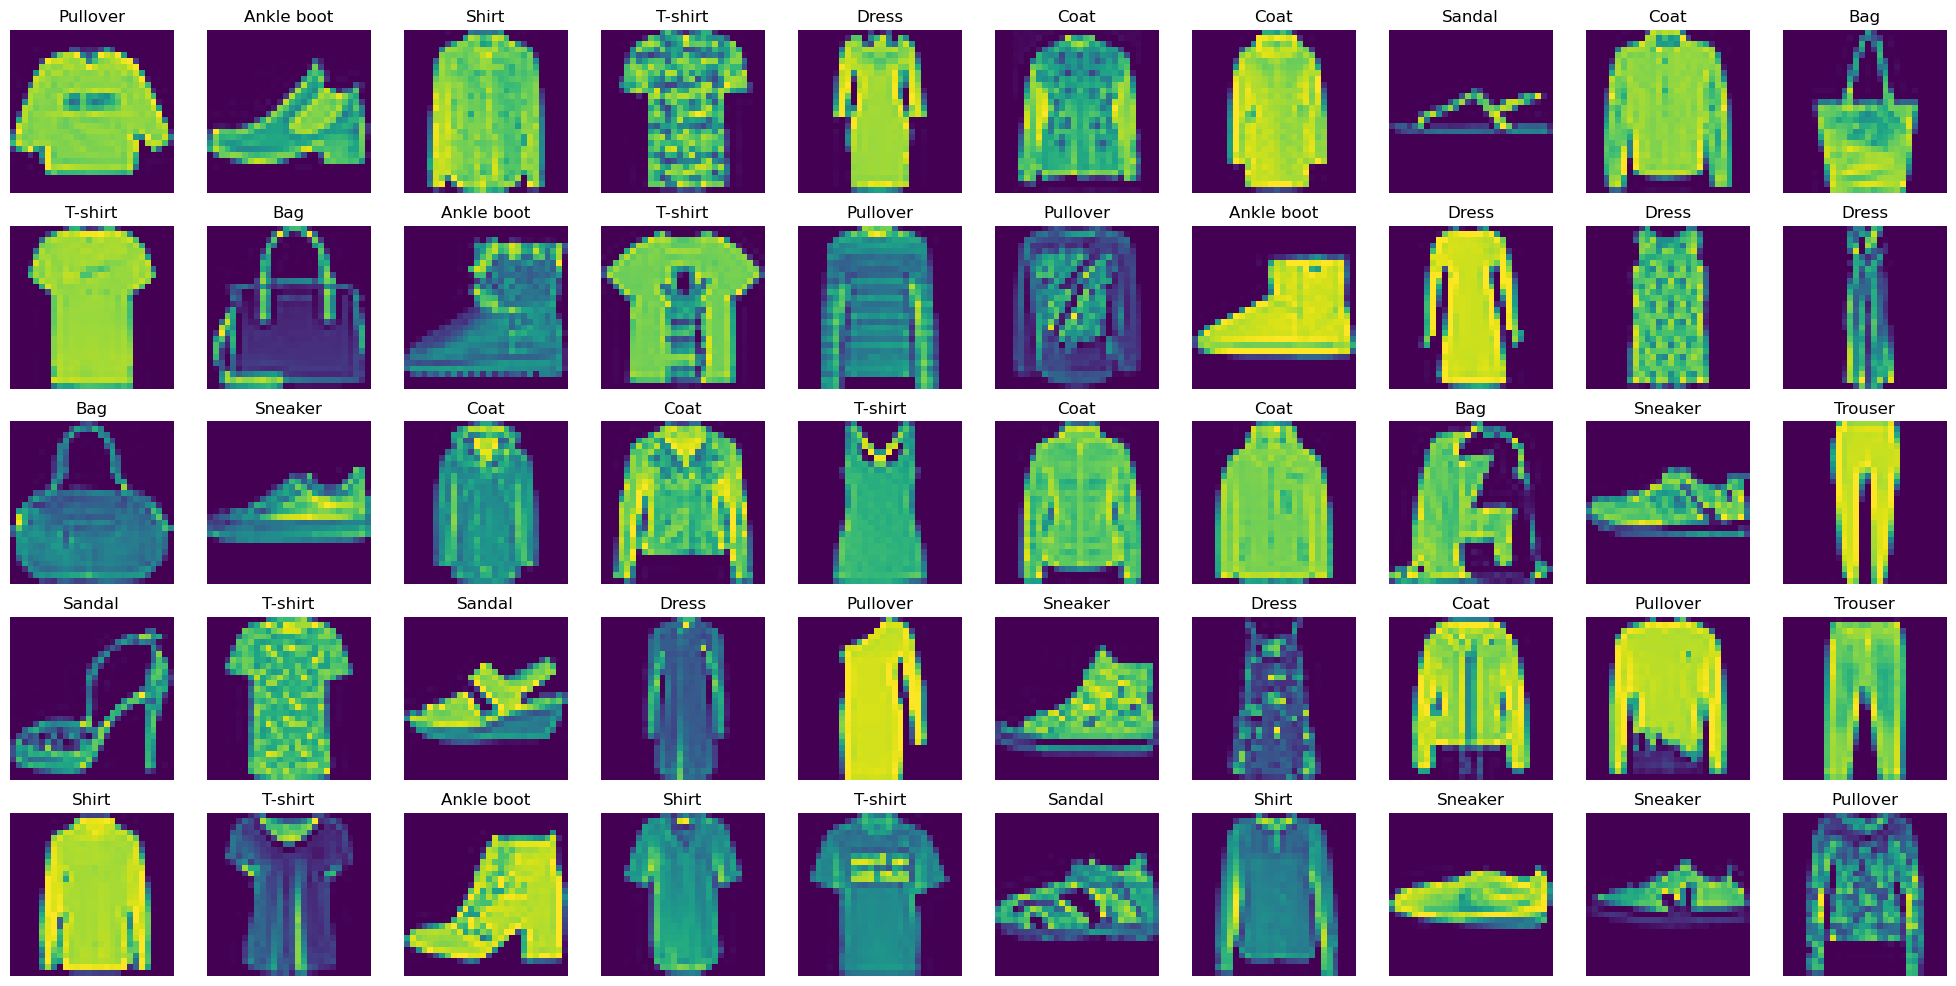

In [ ]:
# show  random 50 images 
images = np.array(images).reshape(images.shape[0],28,28)
plt.figure(figsize=(25, 25))
for i in range(0, 50) :
    plt.subplot(10, 10, i+1)
    plt.axis(False)
    plt.imshow(
        images[i],
        # cmap='Greys',
              )
    plt.title(labels[str(target.iloc[i,0])])

# normalization

In [ ]:
#normalization
images=images/255

plot one image after normalization

In [ ]:
x=np.array(images[0])#.reshape(28,28)
pd.DataFrame(x).style.set_properties(**{'font-size':'3pt'}).background_gradient()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.243137,0.239216,0.082353,0.113725,0.090196,0.200000,0.533333,0.239216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.345098,0.788235,0.894118,0.882353,1.000000,0.450980,0.243137,0.537255,1.000000,0.921569,0.870588,1.000000,0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.184314,0.988235,0.917647,0.933333,0.878431,0.843137,0.843137,0.898039,0.423529,0.705882,0.811765,0.839216,0.878431,0.905882,0.976471,0.996078,0.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.003922,0.000000,0.000000,0.839216,0.870588,0.823529,0.835294,0.878431,0.882353,0.850980,0.862745,0.996078,0.913725,0.858824,0.866667,0.850980,0.874510,0.866667,0.941176,0.996078,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000
7,0.003922,0.000000,0.000000,0.000000,0.501961,0.929412,0.811765,0.878431,0.878431,0.811765,0.847059,0.839216,0.823529,0.815686,0.827451,0.866667,0.815686,0.858824,0.835294,0.886275,0.827451,0.929412,0.588235,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.007843,0.000000,0.000000,0.929412,0.870588,0.843137,0.811765,0.823529,0.831373,0.835294,0.807843,0.839216,0.835294,0.839216,0.835294,0.823529,0.843137,0.839216,0.807843,0.780392,0.854902,1.000000,0.050980,0.000000,0.007843,0.000000,0.000000
9,0.000000,0.015686,0.000000,0.333333,0.894118,0.823529,0.854902,0.784314,0.827451,0.815686,0.796078,0.843137,0.823529,0.819608,0.819608,0.823529,0.835294,0.827451,0.823529,0.850980,0.807843,0.835294,0.905882,0.686275,0.000000,0.000000,0.000000,0.000000


In [ ]:
# check if the images and target have the same number of rows befor use the model
print(images.shape)
print(target.shape)

(59957, 28, 28)
(59957, 1)


## encode the output label using one hot encode

In [ ]:
# One-hot encode the output labels
labels_one_hot = to_categorical(target)
# show the new shape of output target after encoding
print(labels_one_hot.shape)
# show  output target after encoding
print(labels_one_hot)

(59957, 10)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# plot the Loss and Accuracy

In [ ]:
def plot_loss_accuracy(history):
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss) + 1)
    #----------------------------------------
    #----------------------------------------
    # show the loss
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].plot(epochs,loss,label='training loss')
    axs[0].plot(epochs,val_loss,label='validation loss')
    axs[0].set_title("Loss")
    axs[0].legend(loc="upper right")
    #----------------------------------------
    plt.subplots_adjust(wspace=0.5)
    #----------------------------------------
    # show the accuracy
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].plot(epochs,acc,    label='training accuracy')
    axs[1].plot(epochs,val_acc,label='validation accuracy')
    axs[1].set_title("accuracy")
    axs[1].legend(loc="lower right")
    # Show the figure
    plt.show()
    
    


def display_fold_accuracy(folds, accuracies):
    plt.figure(figsize=(5,5))
    plt.plot(folds, accuracies)
    # make axis as discrete values
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title('Model Accuracy')
    plt.ylabel('Accuracies')
    plt.xlabel('Folds')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()
    
    
def display_fold_loss(folds, losses):
    plt.figure(figsize=(5,5))
    plt.plot(folds, losses)
    # make axis as discrete values
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title('Model Loss')
    plt.ylabel('Losses')
    plt.xlabel('Folds')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

# Trail 1
- # in this Trail we not use one hot encode
- # split data to train and validate

In [ ]:
# split data
#------------------------------------------------
#------------------------------------------------
print('*'*50)
print('the shape of the orginal dataset')
print(images.shape)
print(target.shape)
print('*'*50)
#------------------------------------------------
#------------------------------------------------
# Split the dataset into a training set and a validate set
X_train, X_validate, y_train, y_validate = train_test_split( images ,target , test_size=0.15, random_state=42)
#------------------------------------------------
#------------------------------------------------
# Print the shapes of the training set and the testing set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print('*'*50)
print("X_validate shape:", X_validate.shape)
print("y_validate shape:", y_validate.shape)
print('*'*50)
#------------------------------------------------
#------------------------------------------------
#------------------------------------------------

**************************************************
the shape of the orginal dataset
(59957, 28, 28)
(59957, 1)
**************************************************
X_train shape: (50963, 28, 28)
y_train shape: (50963, 1)
**************************************************
X_validate shape: (8994, 28, 28)
y_validate shape: (8994, 1)
**************************************************


standerd LeNet5

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 120)              

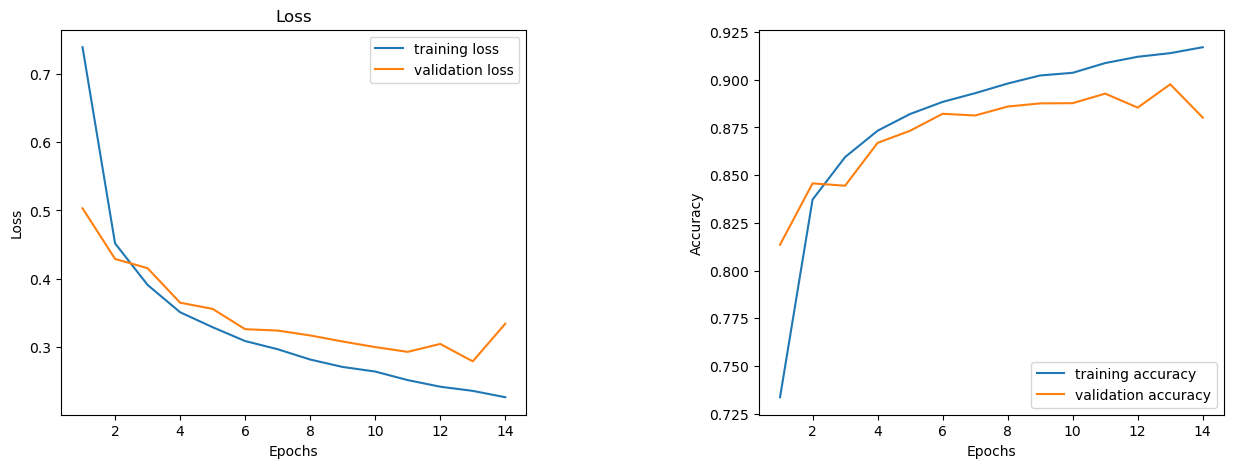

In [ ]:
# # Define the standerd LeNet5 architecture
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# show madel summary
print(model.summary())
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
standerd_history=model.fit(X_train, y_train, batch_size=128, epochs=14, validation_data=(X_validate, y_validate))
plot_loss_accuracy(standerd_history)

# try to tune hyperparameters LeNet5 wthin:

- Hidden Layer Size
- Learning Rate

In [ ]:


# Define the LeNet5 architecture
model = Sequential()
model.add(Conv2D(filters=60, kernel_size=(2, 2), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=84, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=240, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# show madel summary
print(model.summary())


# Define a learning rate schedule
def scheduler(epoch):
    if epoch < 10:
        return 0.01
    else:
        return 0.001 * np.exp(0.1 * (10 - epoch))

# Create a learning rate scheduler object
lr_scheduler = LearningRateScheduler(scheduler)

# Compile the model
optimizer=Adam(learning_rate=0.01)


model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model with the learning rate scheduler
opt_Le_net=model.fit(X_train, y_train, batch_size=50, epochs=20, callbacks=[lr_scheduler],validation_data=(X_validate, y_validate))


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 27, 27, 60)        300       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 60)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 84)        20244     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 84)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 3024)              0         
                                                                 
 dense_36 (Dense)            (None, 240)             

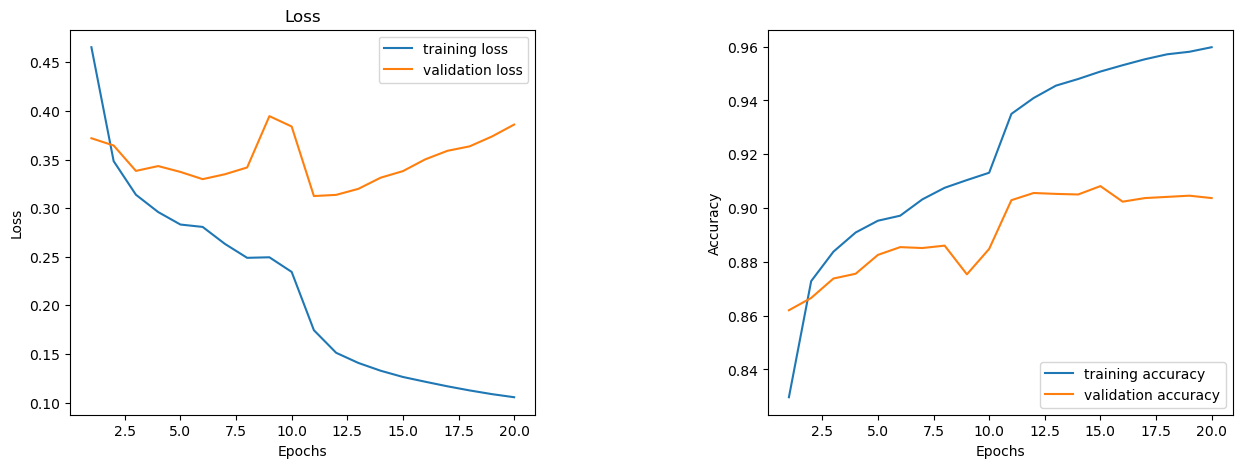

In [ ]:
plot_loss_accuracy(opt_Le_net)

# Using KFold

**************************************************
**************************************************
-------------------Fold : 1  -------------------
Epoch 1/10
319/319 [==============================] - 13s 36ms/step - loss: 0.7322 - accuracy: 0.7334 - val_loss: 0.5095 - val_accuracy: 0.8114
Epoch 2/10
319/319 [==============================] - 10s 32ms/step - loss: 0.4657 - accuracy: 0.8307 - val_loss: 0.4645 - val_accuracy: 0.8299
Epoch 3/10
319/319 [==============================] - 10s 31ms/step - loss: 0.4140 - accuracy: 0.8516 - val_loss: 0.3934 - val_accuracy: 0.8631
Epoch 4/10
319/319 [==============================] - 10s 33ms/step - loss: 0.3779 - accuracy: 0.8642 - val_loss: 0.3753 - val_accuracy: 0.8617
Epoch 5/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3545 - accuracy: 0.8716 - val_loss: 0.3750 - val_accuracy: 0.8631
Epoch 6/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3356 - accuracy: 0.8782 - val_loss: 0.3386 - val_ac

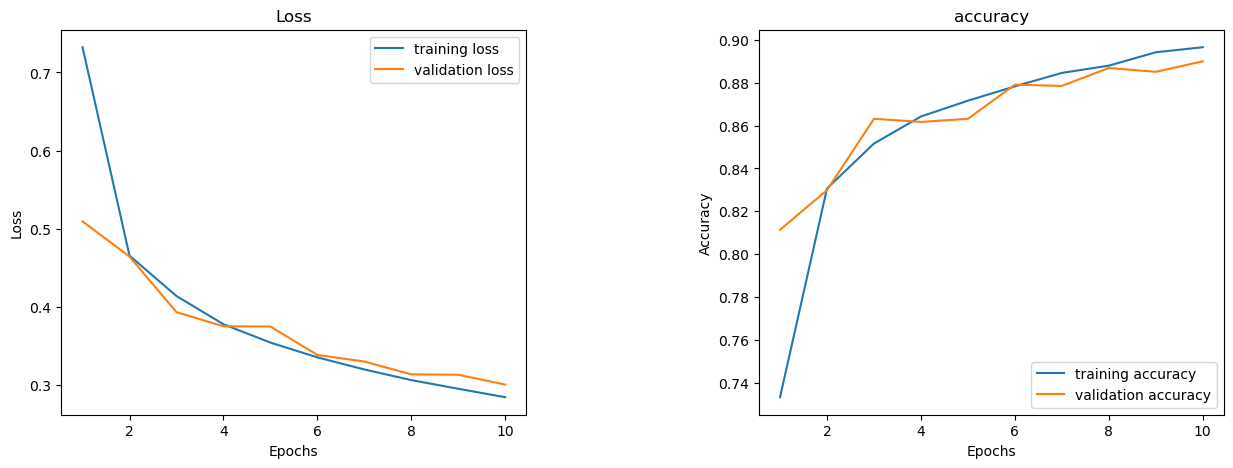

**************************************************
**************************************************
-------------------Fold : 2  -------------------
Epoch 1/10
319/319 [==============================] - 11s 32ms/step - loss: 0.7559 - accuracy: 0.7262 - val_loss: 0.5497 - val_accuracy: 0.7946
Epoch 2/10
319/319 [==============================] - 10s 32ms/step - loss: 0.4766 - accuracy: 0.8266 - val_loss: 0.4564 - val_accuracy: 0.8360
Epoch 3/10
319/319 [==============================] - 10s 32ms/step - loss: 0.4132 - accuracy: 0.8502 - val_loss: 0.3889 - val_accuracy: 0.8557
Epoch 4/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3792 - accuracy: 0.8630 - val_loss: 0.3664 - val_accuracy: 0.8676
Epoch 5/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3533 - accuracy: 0.8709 - val_loss: 0.3516 - val_accuracy: 0.8701
Epoch 6/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3371 - accuracy: 0.8768 - val_loss: 0.3387 - val_ac

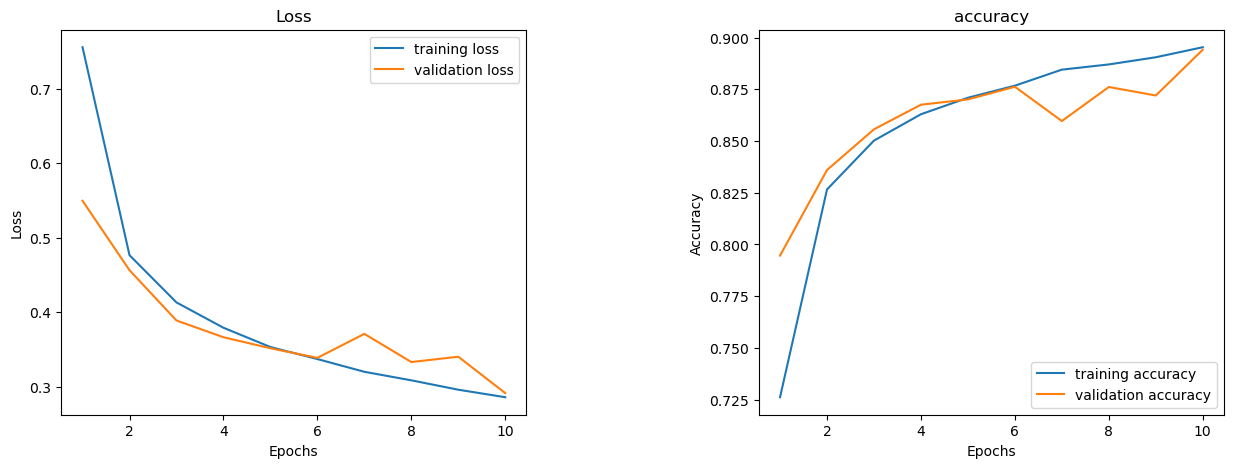

**************************************************
**************************************************
-------------------Fold : 3  -------------------
Epoch 1/10
319/319 [==============================] - 12s 34ms/step - loss: 0.7827 - accuracy: 0.7192 - val_loss: 0.5554 - val_accuracy: 0.7909
Epoch 2/10
319/319 [==============================] - 10s 32ms/step - loss: 0.4983 - accuracy: 0.8170 - val_loss: 0.4518 - val_accuracy: 0.8384
Epoch 3/10
319/319 [==============================] - 10s 32ms/step - loss: 0.4286 - accuracy: 0.8454 - val_loss: 0.4187 - val_accuracy: 0.8568
Epoch 4/10
319/319 [==============================] - 11s 35ms/step - loss: 0.3875 - accuracy: 0.8605 - val_loss: 0.3776 - val_accuracy: 0.8649
Epoch 5/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3622 - accuracy: 0.8693 - val_loss: 0.3540 - val_accuracy: 0.8718
Epoch 6/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3396 - accuracy: 0.8782 - val_loss: 0.3438 - val_ac

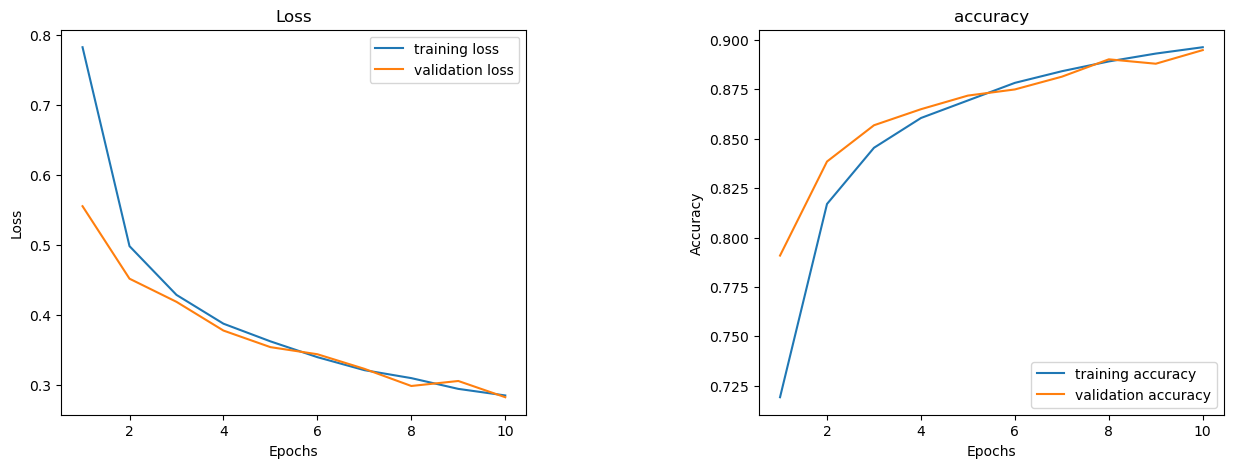

**************************************************
**************************************************
-------------------Fold : 4  -------------------
Epoch 1/10
319/319 [==============================] - 11s 32ms/step - loss: 0.7601 - accuracy: 0.7264 - val_loss: 0.5692 - val_accuracy: 0.7746
Epoch 2/10
319/319 [==============================] - 10s 33ms/step - loss: 0.4794 - accuracy: 0.8248 - val_loss: 0.4800 - val_accuracy: 0.8222
Epoch 3/10
319/319 [==============================] - 10s 32ms/step - loss: 0.4190 - accuracy: 0.8483 - val_loss: 0.4042 - val_accuracy: 0.8558
Epoch 4/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3765 - accuracy: 0.8649 - val_loss: 0.3689 - val_accuracy: 0.8638
Epoch 5/10
319/319 [==============================] - 11s 33ms/step - loss: 0.3506 - accuracy: 0.8738 - val_loss: 0.3722 - val_accuracy: 0.8671
Epoch 6/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3335 - accuracy: 0.8794 - val_loss: 0.3387 - val_ac

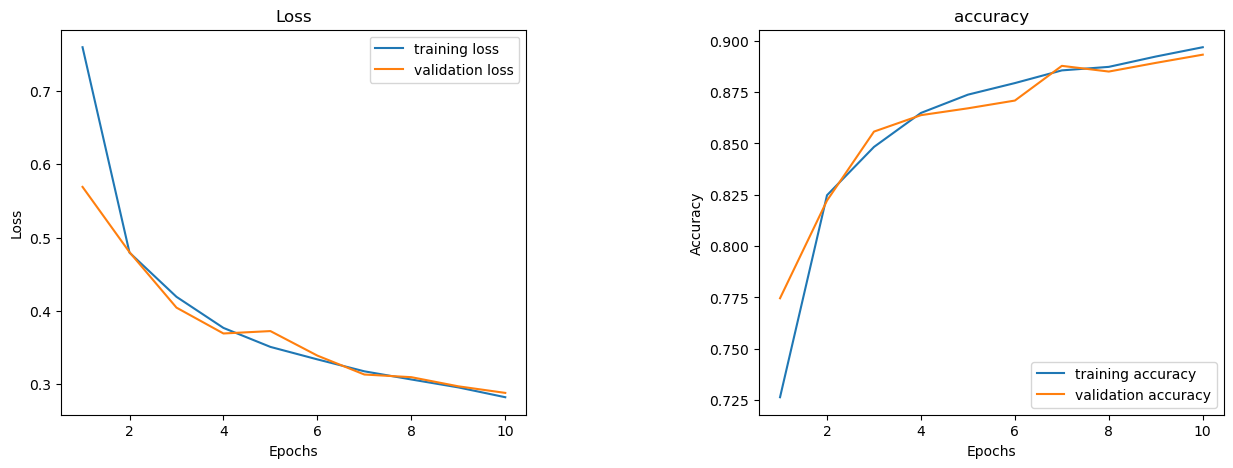

**************************************************
**************************************************
-------------------Fold : 5  -------------------
Epoch 1/10
319/319 [==============================] - 12s 33ms/step - loss: 0.7861 - accuracy: 0.7071 - val_loss: 0.5555 - val_accuracy: 0.7865
Epoch 2/10
319/319 [==============================] - 10s 31ms/step - loss: 0.4972 - accuracy: 0.8181 - val_loss: 0.4595 - val_accuracy: 0.8326
Epoch 3/10
319/319 [==============================] - 10s 31ms/step - loss: 0.4203 - accuracy: 0.8469 - val_loss: 0.3863 - val_accuracy: 0.8595
Epoch 4/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3785 - accuracy: 0.8634 - val_loss: 0.3560 - val_accuracy: 0.8705
Epoch 5/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3516 - accuracy: 0.8723 - val_loss: 0.3375 - val_accuracy: 0.8809
Epoch 6/10
319/319 [==============================] - 10s 32ms/step - loss: 0.3310 - accuracy: 0.8794 - val_loss: 0.3350 - val_ac

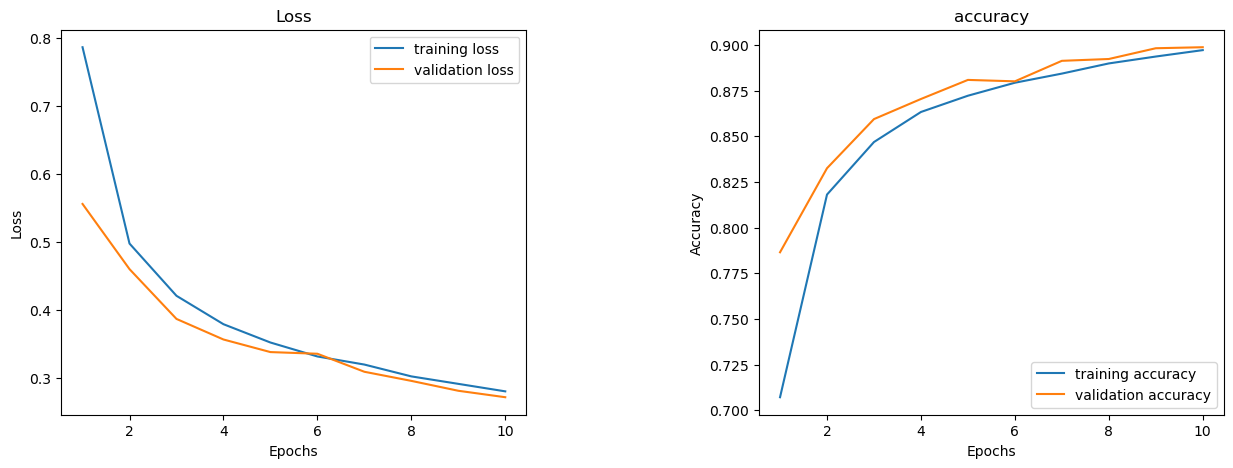

In [ ]:


# Define the K-fold cross-validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Define the deep learning model
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# # Train and evaluate the model using K-fold cross-validation
fold = 1
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X_train, y_train):
    print('*'*50)
    print('*'*50)
    print("-------------------Fold :", fold,' -------------------')    
    Xx_train, yy_train = images[train_index], np.array(target)[train_index]
    Xx_test , yy_test   = images[test_index], np.array(target)[test_index]
    model = create_model()
    history=model.fit(Xx_train, yy_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_validate, y_validate))
    loss, accuracy = model.evaluate(Xx_test, yy_test, verbose=1)
    print('*'*50)
    print('*'*50)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)
    print('*'*50)
    print('*'*50)

    fold += 1
    # show the loss and accuracy
    plot_loss_accuracy(history)
    

# Trail 2
## In This Trail Will Use One Hot Encoding

In [ ]:
#----------------------------------------
#----------------------------------------
print('*'*50)
print('the orginal data befor split')
print(target.shape)
print(images.shape)
print(labels_one_hot.shape)
print('*'*50)
#----------------------------------------
#----------------------------------------
# Split the dataset into a training set and a testing set
X_train_one_hot, X_validate_one_hot, y_train_one_hot, y_validate_one_hot = train_test_split( images ,labels_one_hot , test_size=0.15, random_state=42)
# Print the shapes of the training set and the testing set
#----------------------------------------
#----------------------------------------
print("X_train shape:", X_train_one_hot.shape)
print("y_train shape:", y_train_one_hot.shape)
print('*'*50)
print("X_validation shape:", X_validate_one_hot.shape)
print("y_validation shape:", y_validate_one_hot.shape)
print('*'*50)
#----------------------------------------
#----------------------------------------

**************************************************
the orginal data befor split
(59957, 1)
(59957, 28, 28)
(59957, 10)
**************************************************
X_train shape: (50963, 28, 28)
y_train shape: (50963, 10)
**************************************************
X_validation shape: (8994, 28, 28)
y_validation shape: (8994, 10)
**************************************************


# Using KFold

Fold: 1
Epoch 1/10
319/319 [==============================] - 3s 5ms/step - loss: 0.7816 - accuracy: 0.7115 - val_loss: 0.5456 - val_accuracy: 0.7921
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.5077 - accuracy: 0.8123 - val_loss: 0.4656 - val_accuracy: 0.8288
Epoch 3/10
319/319 [==============================] - 2s 5ms/step - loss: 0.4299 - accuracy: 0.8439 - val_loss: 0.4144 - val_accuracy: 0.8510
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3896 - accuracy: 0.8589 - val_loss: 0.3933 - val_accuracy: 0.8560
Epoch 5/10
319/319 [==============================] - 1s 5ms/step - loss: 0.3576 - accuracy: 0.8724 - val_loss: 0.3741 - val_accuracy: 0.8682
Epoch 6/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3373 - accuracy: 0.8785 - val_loss: 0.3580 - val_accuracy: 0.8729
Epoch 7/10
319/319 [==============================] - 1s 5ms/step - loss: 0.3218 - accuracy: 0.8828 - val_loss: 0.3417 - val_accuracy: 0.876

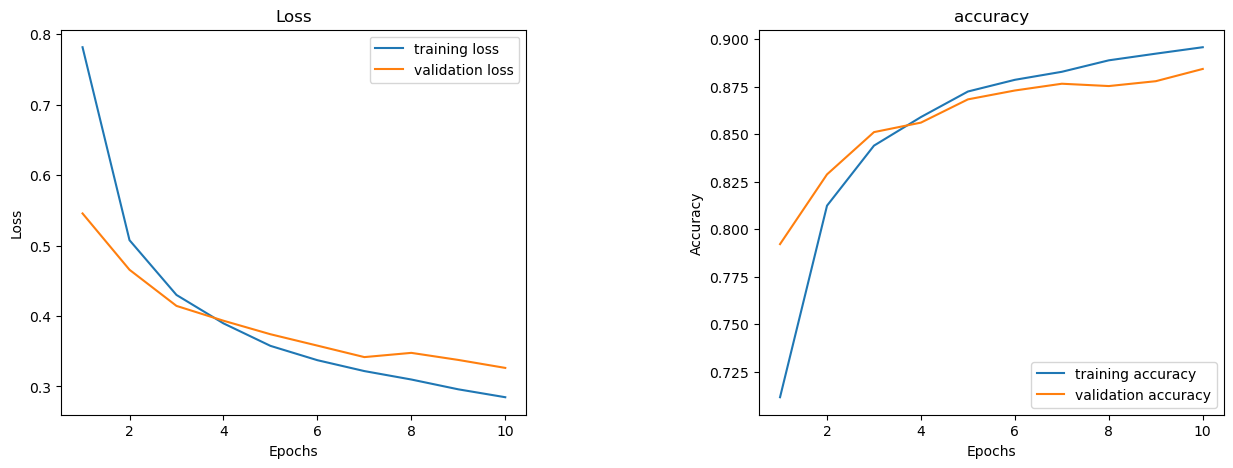

Fold: 2
Epoch 1/10
319/319 [==============================] - 3s 5ms/step - loss: 0.7484 - accuracy: 0.7290 - val_loss: 0.5289 - val_accuracy: 0.8073
Epoch 2/10
319/319 [==============================] - 2s 6ms/step - loss: 0.4723 - accuracy: 0.8317 - val_loss: 0.4364 - val_accuracy: 0.8430
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8534 - val_loss: 0.3991 - val_accuracy: 0.8565
Epoch 4/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3764 - accuracy: 0.8652 - val_loss: 0.3772 - val_accuracy: 0.8632
Epoch 5/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3530 - accuracy: 0.8733 - val_loss: 0.3576 - val_accuracy: 0.8709
Epoch 6/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3338 - accuracy: 0.8787 - val_loss: 0.3565 - val_accuracy: 0.8716
Epoch 7/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3165 - accuracy: 0.8857 - val_loss: 0.3366 - val_accuracy: 0.873

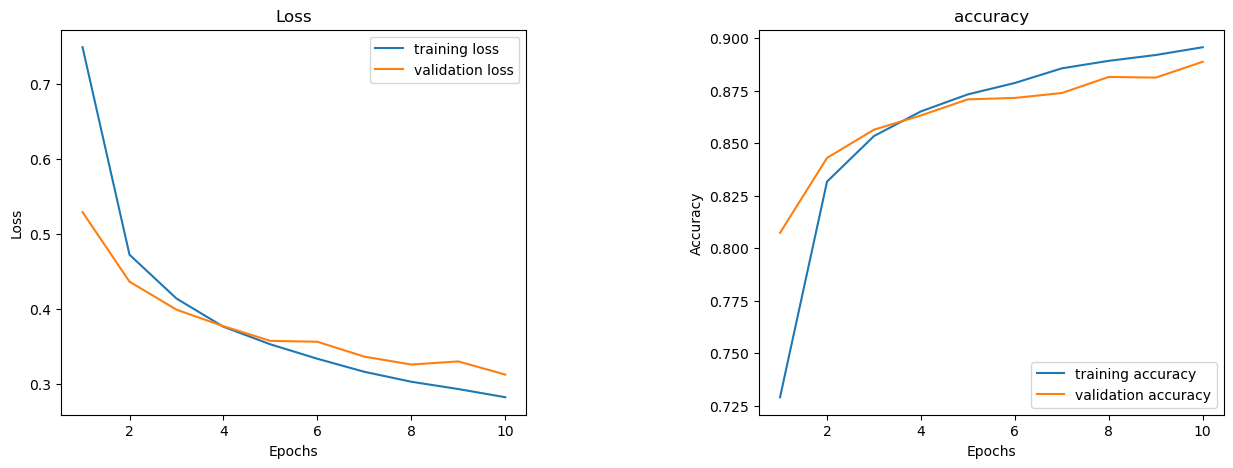

Fold: 3
Epoch 1/10
319/319 [==============================] - 4s 6ms/step - loss: 0.7692 - accuracy: 0.7164 - val_loss: 0.5903 - val_accuracy: 0.7797
Epoch 2/10
319/319 [==============================] - 1s 5ms/step - loss: 0.5150 - accuracy: 0.8119 - val_loss: 0.5379 - val_accuracy: 0.7954
Epoch 3/10
319/319 [==============================] - 2s 5ms/step - loss: 0.4518 - accuracy: 0.8368 - val_loss: 0.4525 - val_accuracy: 0.8357
Epoch 4/10
319/319 [==============================] - 1s 5ms/step - loss: 0.4107 - accuracy: 0.8529 - val_loss: 0.4234 - val_accuracy: 0.8394
Epoch 5/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8588 - val_loss: 0.3947 - val_accuracy: 0.8591
Epoch 6/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3646 - accuracy: 0.8679 - val_loss: 0.3860 - val_accuracy: 0.8612
Epoch 7/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3474 - accuracy: 0.8734 - val_loss: 0.3644 - val_accuracy: 0.868

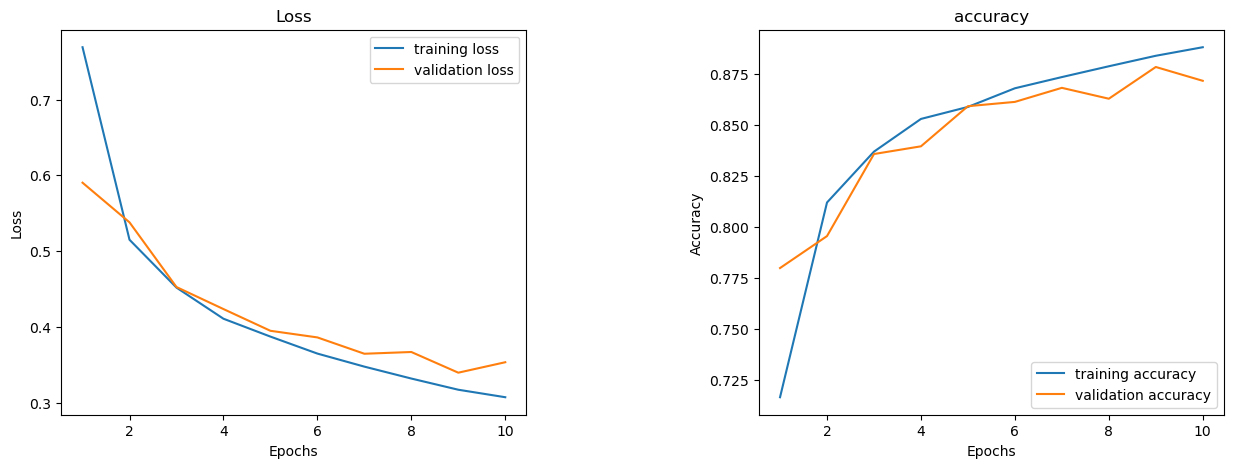

Fold: 4
Epoch 1/10
319/319 [==============================] - 3s 5ms/step - loss: 0.7515 - accuracy: 0.7301 - val_loss: 0.5245 - val_accuracy: 0.8080
Epoch 2/10
319/319 [==============================] - 2s 5ms/step - loss: 0.4678 - accuracy: 0.8292 - val_loss: 0.4319 - val_accuracy: 0.8407
Epoch 3/10
319/319 [==============================] - 1s 4ms/step - loss: 0.4072 - accuracy: 0.8530 - val_loss: 0.3954 - val_accuracy: 0.8608
Epoch 4/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3677 - accuracy: 0.8667 - val_loss: 0.3718 - val_accuracy: 0.8668
Epoch 5/10
319/319 [==============================] - 1s 5ms/step - loss: 0.3430 - accuracy: 0.8765 - val_loss: 0.3507 - val_accuracy: 0.8731
Epoch 6/10
319/319 [==============================] - 1s 4ms/step - loss: 0.3212 - accuracy: 0.8834 - val_loss: 0.3409 - val_accuracy: 0.8747
Epoch 7/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3071 - accuracy: 0.8881 - val_loss: 0.3343 - val_accuracy: 0.879

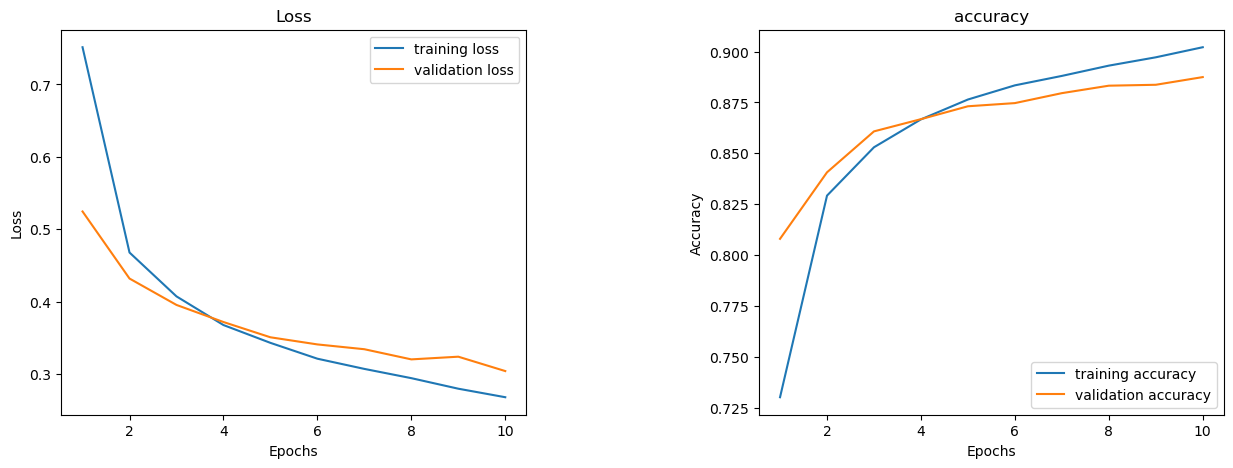

Fold: 5
Epoch 1/10
319/319 [==============================] - 3s 5ms/step - loss: 0.7481 - accuracy: 0.7315 - val_loss: 0.5587 - val_accuracy: 0.7968
Epoch 2/10
319/319 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.8273 - val_loss: 0.4506 - val_accuracy: 0.8402
Epoch 3/10
319/319 [==============================] - 2s 5ms/step - loss: 0.4168 - accuracy: 0.8496 - val_loss: 0.4021 - val_accuracy: 0.8535
Epoch 4/10
319/319 [==============================] - 1s 5ms/step - loss: 0.3775 - accuracy: 0.8619 - val_loss: 0.3893 - val_accuracy: 0.8580
Epoch 5/10
319/319 [==============================] - 2s 6ms/step - loss: 0.3520 - accuracy: 0.8736 - val_loss: 0.3770 - val_accuracy: 0.8627
Epoch 6/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3290 - accuracy: 0.8801 - val_loss: 0.3480 - val_accuracy: 0.8727
Epoch 7/10
319/319 [==============================] - 2s 5ms/step - loss: 0.3143 - accuracy: 0.8863 - val_loss: 0.3344 - val_accuracy: 0.877

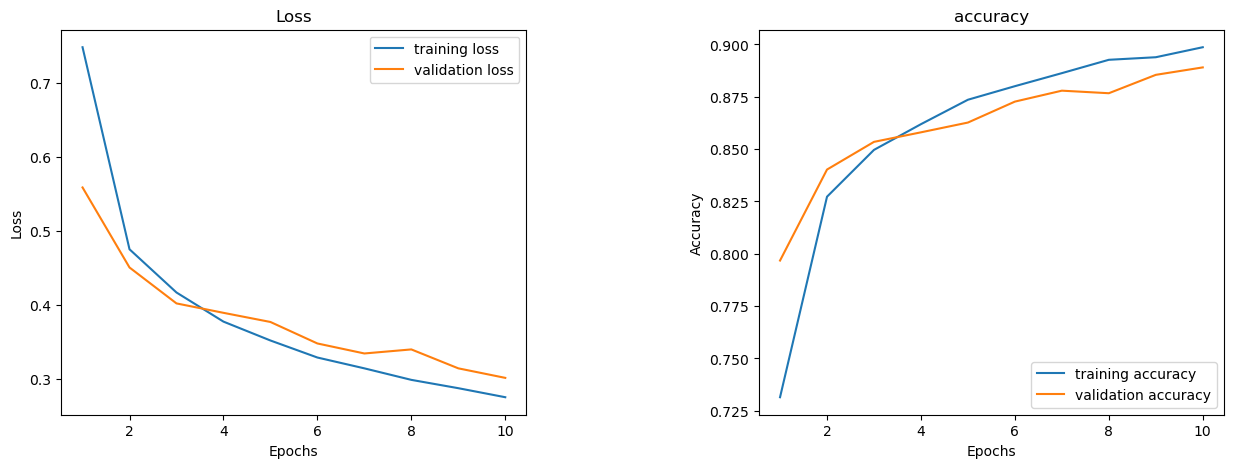

In [ ]:
# train model using kfold=5
# Define the K-fold cross-validation method

number_of_folds=5
kfold = KFold(n_splits=number_of_folds, shuffle=True, random_state=42)
fold = 1
models = []
accuracies = []
losses = []

# Define the deep learning model
def create_model():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model


# Train and evaluate the model using K-fold cross-validation
for train_index, test_index in kfold.split(X_train_one_hot, y_train_one_hot):
    print("Fold:", fold)
    Xx_train, yy_train = X_train_one_hot[train_index], y_train_one_hot[train_index]
    Xx_test, yy_test   = X_train_one_hot[test_index] , y_train_one_hot[test_index]
    model = create_model()
    history=model.fit(Xx_train, yy_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_validate_one_hot, y_validate_one_hot))
    loss, accuracy = model.evaluate(Xx_test, yy_test, verbose=1)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)

    models.append(model)
    accuracies.append(accuracy * 100)
    losses.append(loss)
    fold += 1
    # show the loss and accuracy
    plot_loss_accuracy(history)

[1, 2, 3, 4, 5]


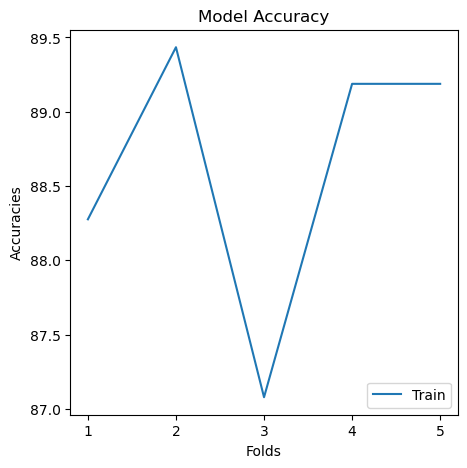

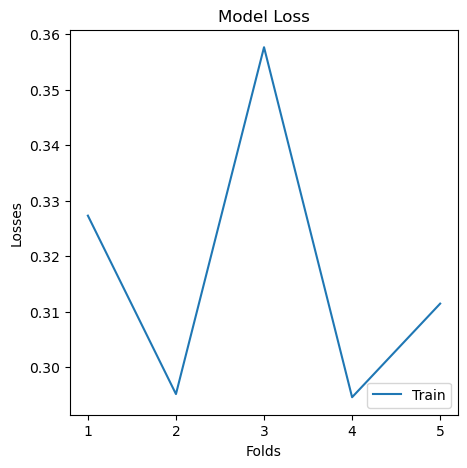

In [ ]:
l=[x for x in range(1,number_of_folds+1)]
display_fold_accuracy(l, accuracies)
print()
display_fold_loss(l, losses)

# Transfer learning

## Using VGG16 pre_trained model

In [ ]:
# Load the VGG16 pre-trained model
base_model = keras.applications.VGG16(
    weights="imagenet",  # Load pre-trained weights
    input_shape=(224, 224, 3),  # Set input shape
    include_top=False,  # Don't include classification layer
)
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Concatenate()([inputs, inputs, inputs])  # Convert gray scale to RGB
x = layers.UpSampling2D(size=(8, 8))(x)  # Upsample from (28, 28, 3) to (224, 224, 3)
x = base_model(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
vgg_model = keras.Model(inputs, outputs)

# Compile the model
vgg_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 28, 28, 3)    0           ['input_2[0][0]',                
                                                                  'input_2[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 224, 224, 3)  0           ['concatenate[0][0]']            
                                                                                              

In [ ]:
vgg_history=vgg_model.fit(X_train_one_hot,y_train_one_hot, epochs=10, batch_size=128, verbose=1,validation_data=(X_validate_one_hot, y_validate_one_hot))

Epoch 1/10
399/399 [==============================] - 117s 266ms/step - loss: 0.6904 - accuracy: 0.7686 - val_loss: 0.3538 - val_accuracy: 0.8775
Epoch 2/10
399/399 [==============================] - 104s 261ms/step - loss: 0.4390 - accuracy: 0.8452 - val_loss: 0.2918 - val_accuracy: 0.8957
Epoch 3/10
399/399 [==============================] - 98s 246ms/step - loss: 0.4017 - accuracy: 0.8544 - val_loss: 0.3073 - val_accuracy: 0.8816
Epoch 4/10
399/399 [==============================] - 98s 246ms/step - loss: 0.3806 - accuracy: 0.8623 - val_loss: 0.2780 - val_accuracy: 0.8975
Epoch 5/10
399/399 [==============================] - 98s 246ms/step - loss: 0.3513 - accuracy: 0.8705 - val_loss: 0.2661 - val_accuracy: 0.8998
Epoch 6/10
399/399 [==============================] - 98s 246ms/step - loss: 0.3350 - accuracy: 0.8764 - val_loss: 0.2543 - val_accuracy: 0.9056
Epoch 7/10
399/399 [==============================] - 104s 261ms/step - loss: 0.3392 - accuracy: 0.8725 - val_loss: 0.2569 - val

282/282 [==============================] - 20s 60ms/step - loss: 0.2436 - accuracy: 0.9118
Validation Loss: 0.24358636140823364
Validation Accuracy: 0.9118301272392273


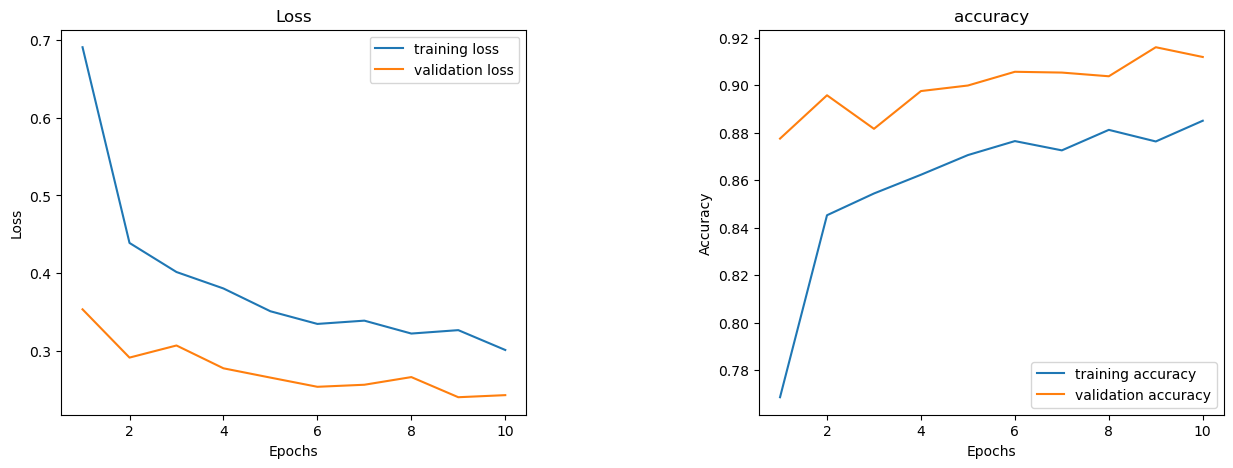

In [ ]:
# get the accuracy and loss for last itraion on the validation set
loss, accuracy = vgg_model.evaluate(X_validate_one_hot, y_validate_one_hot, verbose=1)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
# show the loss and accuracy
plot_loss_accuracy(vgg_history)

# we try to add some layers to VGG16 to get heigh accuracy

In [ ]:
from keras.applications.vgg16 import VGG16
import os
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization ,Activation , MaxPooling2D
import cv2

# Load the VGG16 pre-trained model
base_model = keras.applications.VGG16(
    weights="imagenet",  # Load pre-trained weights
    input_shape=(224, 224, 3),  # Set input shape
    include_top=False,  # Don't include classification layer
)
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Concatenate()([inputs, inputs, inputs])  # Convert gray scale to RGB
x = layers.UpSampling2D(size=(8, 8))(x)  # Upsample from (28, 28, 3) to (224, 224, 3)
x = base_model(x)
## add extera layers
x = layers.Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' )(x)
x = layers.MaxPool2D((2,2) , strides = 2 , padding = 'same')(x)
x = layers.Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' )(x)
x = layers.MaxPool2D((2,2) , strides = 2 , padding = 'same')(x)
x = layers.Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' )(x)
x = layers.MaxPool2D((2,2) , strides = 2 , padding = 'same')(x)
x = layers.Flatten()(x)
x = layers.Dense(units = 512 , activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(units = 256 , activation = 'relu')(x)
outputs = layers.Dense(10, activation="softmax")(x)
vgg_model_optimized = keras.Model(inputs, outputs)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg_model_optimized.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 28, 28, 3)    0           ['input_2[0][0]',                
                                                                  'input_2[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 224, 224, 3)  0           ['concatenate[0][0]']            
                                                                                              

In [ ]:

# Define a learning rate schedule
def scheduler(epoch):
    if epoch < 10:
        return 0.01
    else:
        return 0.001 * np.exp(0.1 * (10 - epoch))

# Create a learning rate scheduler object
lr_scheduler = LearningRateScheduler(scheduler)
# Compile the model
optimizer=Adam(learning_rate=0.01)
vgg_model_optimized.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
vgg_model_optimized_history=vgg_model_optimized.fit(X_train_one_hot,
                                                    y_train_one_hot,
                                                    epochs=20,
                                                    batch_size=256,
                                                    callbacks=[lr_scheduler],
                                                    verbose=1,
                                                    validation_data=(X_validate_one_hot, y_validate_one_hot))

Epoch 1/20
200/200 [==============================] - 127s 518ms/step - loss: 1.3563 - accuracy: 0.6787 - val_loss: 0.5662 - val_accuracy: 0.8110 - lr: 0.0100
Epoch 2/20
200/200 [==============================] - 104s 522ms/step - loss: 0.3933 - accuracy: 0.8643 - val_loss: 0.4147 - val_accuracy: 0.8642 - lr: 0.0100
Epoch 3/20
200/200 [==============================] - 104s 522ms/step - loss: 0.3431 - accuracy: 0.8825 - val_loss: 0.3621 - val_accuracy: 0.8694 - lr: 0.0100
Epoch 4/20
200/200 [==============================] - 104s 521ms/step - loss: 0.3121 - accuracy: 0.8923 - val_loss: 0.4342 - val_accuracy: 0.8537 - lr: 0.0100
Epoch 5/20
200/200 [==============================] - 104s 522ms/step - loss: 0.3199 - accuracy: 0.8929 - val_loss: 0.3212 - val_accuracy: 0.8905 - lr: 0.0100
Epoch 6/20
200/200 [==============================] - 104s 522ms/step - loss: 0.2884 - accuracy: 0.9010 - val_loss: 0.2890 - val_accuracy: 0.8980 - lr: 0.0100
Epoch 7/20
200/200 [==========================

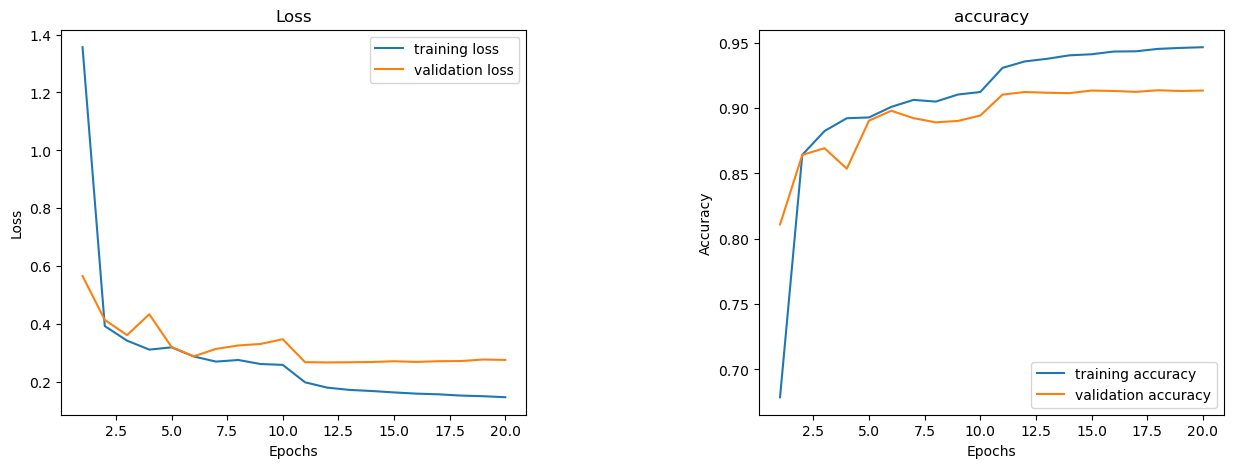

In [ ]:
plot_loss_accuracy(vgg_model_optimized_history)

# Using mobile net pre_trained model

In [ ]:
# mobile net
# Load the MobileNetV2 pre-trained model
base_model = keras.applications.MobileNetV2(
    weights="imagenet",  # Load pre-trained weights
    input_shape=(224, 224, 3),  # Set input shape
    include_top=False,  # Don't include classification layer
)
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new layers on top of the pre-trained layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Concatenate()([inputs, inputs, inputs])  # Convert gray scale to RGB
x = layers.UpSampling2D(size=(8, 8))(x)  # Upsample from (28, 28, 3) to (224, 224, 3)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)
mobile_net_model = keras.Model(inputs, outputs)

# Compile the model
mobile_net_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobile_net_model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 28, 28, 3)    0           ['input_25[0][0]',               
                                                                  'input_25[0][0]',               
                                                                  'input_25[0][0]']               
                                                                                                  
 up_sampling2d_1 (UpSampling2D)  (None, 224, 224, 3)  0          ['concatenate_3[0][0]']          
                                                                                           

Epoch 1/10
399/399 [==============================] - 42s 96ms/step - loss: 0.5455 - accuracy: 0.8075 - val_loss: 0.3835 - val_accuracy: 0.8589
Epoch 2/10
399/399 [==============================] - 42s 105ms/step - loss: 0.3977 - accuracy: 0.8551 - val_loss: 0.3525 - val_accuracy: 0.8691
Epoch 3/10
399/399 [==============================] - 37s 93ms/step - loss: 0.3641 - accuracy: 0.8692 - val_loss: 0.3196 - val_accuracy: 0.8837
Epoch 4/10
399/399 [==============================] - 37s 93ms/step - loss: 0.3413 - accuracy: 0.8762 - val_loss: 0.3282 - val_accuracy: 0.8735
Epoch 5/10
399/399 [==============================] - 42s 106ms/step - loss: 0.3273 - accuracy: 0.8790 - val_loss: 0.3009 - val_accuracy: 0.8887
Epoch 6/10
399/399 [==============================] - 37s 94ms/step - loss: 0.3206 - accuracy: 0.8829 - val_loss: 0.3024 - val_accuracy: 0.8944
Epoch 7/10
399/399 [==============================] - 38s 94ms/step - loss: 0.3089 - accuracy: 0.8875 - val_loss: 0.2937 - val_accurac

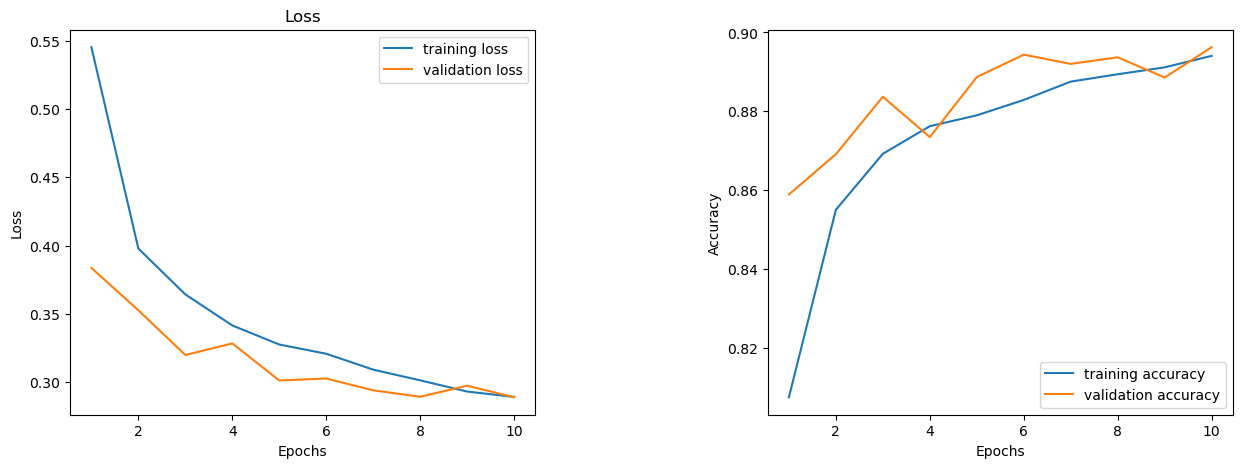

In [ ]:
mobile_net_history=mobile_net_model.fit(X_train_one_hot,y_train_one_hot,epochs=10,batch_size=128,verbose=1,validation_data=(X_validate_one_hot,y_validate_one_hot))
# get the accuracy and loss for last itraion on the validation set
loss, accuracy = mobile_net_model.evaluate(X_validate_one_hot, y_validate_one_hot, verbose=1)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)
# show the loss and accuracy
plot_loss_accuracy(mobile_net_history)

LeNet-5 can improve the accuracy on Fashion-MNIST compared to simpler models,
because it has a more complex architecture compared to the Dense fully connected layer,that is better suited for image classification. 
However, modern models like vgg16, MobileNet,DenseNet, 
and EfficientNet are likely to achieve even better performance on this dataset and not complex and faster 

- and when we compare LeNet with standard VGG16 we get very close accuracy on the validation set but LeNet use Total params: 44,426 and it less than vgg16  (Total params: 21,140,042 and Trainable params: 6,425,354 and Non-trainable params: 14,714,688) so LeNet5 not complex and faster

- and when we compare LeNet with MobileNet we get very close accuracy on the validation set but LeNet use Total params: 44,426 and it less than MobileNet Total params: 2,588,490 and Trainable params: 330,506 and Non-trainable params: 2,257,984 ) so LeNet5 not complex and faster

- it improves accuracy on this task by using convolutional layers to extract features from the images, and pooling layers to reduce the spatial dimensions of the feature maps and it will be fast in deployment phase because number of parameters that use.